In [13]:
import pandas as  pd
import numpy as np
import seaborn as sns

In [2]:
a = pd.read_csv('../data/bertavivesm.20221129144401885.data.csv', delimiter=';')

In [3]:
data = a[['#time',' R1_WNAC/WdSpd.Mean',' R1_WNAC/WdDir.Mean',' R1_WTRF/TrfGriVAr.Mean',' R1_WTRF/TrfGriW.Mean',' R1_WTRF/TrfGriPf.Mean']]
data.columns = ['time','WindSpeed','WindDirection','ReactivePower','ActivePower','PhaseAngle']

In [4]:
data.describe()

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
count,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06,5.230758e+06
mean,6.635825e+04,5.605512e+04,1.506902e+04,1.507089e+04,5.083837e+04
std,2.488902e+05,2.296364e+05,1.218271e+05,1.218253e+05,2.196691e+05
min,8.000000e-01,0.000000e+00,-1.734180e+00,-1.682530e-01,-1.000000e+00
25%,5.750000e+00,1.293000e+02,-1.019930e-01,2.820310e-01,-9.999000e-01
50%,9.000000e+00,2.086500e+02,-1.770020e-03,1.980450e+00,-9.959500e-01
75%,1.300000e+01,2.698500e+02,1.322670e-01,5.055020e+00,-4.776500e-01
max,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05,9.999993e+05


In [5]:
data.set_index('time', inplace=True)

In [6]:
data

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
time,,,,,
2012-11-20 00:00:00,14.90,201.80,-0.666463,5.166350,-0.99460
2012-11-20 00:01:00,14.90,201.80,-0.625202,5.154180,-0.99460
2012-11-20 00:02:00,14.70,204.10,-0.658773,5.136520,-0.99450
2012-11-20 00:03:00,14.30,208.50,-0.628620,5.021540,-0.99675
2012-11-20 00:04:00,13.45,209.65,-0.647664,5.094510,-0.99610
...,...,...,...,...,...
2017-11-20 23:55:00,2.95,120.45,0.031556,-0.063793,0.36055
2017-11-20 23:56:00,2.45,112.95,0.031556,-0.092756,0.39160
2017-11-20 23:57:00,1.80,107.30,0.044557,-0.106760,0.60230


In [7]:
data.replace(999999.333,np.nan, inplace=True)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_50884/3922583670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(999999.333,np.nan, inplace=True)


In [8]:
data.max()

WindSpeed         40.00000
WindDirection    359.90000
ReactivePower      1.64928
ActivePower        5.46260
PhaseAngle         1.00000
dtype: float64

In [9]:
data.ffill(axis=0, inplace=True)

/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_50884/4187836135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ffill(axis=0, inplace=True)


In [10]:
data

,WindSpeed,WindDirection,ReactivePower,ActivePower,PhaseAngle
time,,,,,
2012-11-20 00:00:00,14.90,201.80,-0.666463,5.166350,-0.99460
2012-11-20 00:01:00,14.90,201.80,-0.625202,5.154180,-0.99460
2012-11-20 00:02:00,14.70,204.10,-0.658773,5.136520,-0.99450
2012-11-20 00:03:00,14.30,208.50,-0.628620,5.021540,-0.99675
2012-11-20 00:04:00,13.45,209.65,-0.647664,5.094510,-0.99610
...,...,...,...,...,...
2017-11-20 23:55:00,2.95,120.45,0.031556,-0.063793,0.36055
2017-11-20 23:56:00,2.45,112.95,0.031556,-0.092756,0.39160
2017-11-20 23:57:00,1.80,107.30,0.044557,-0.106760,0.60230


In [17]:
data.boxplot()

AssertionError: 1

In [15]:
sns.boxplot(y=data['WindSpeed'])

<AxesSubplot: ylabel='WindSpeed'>

In [16]:
sns.boxplot(y=data['WindDirection'])

<AxesSubplot: ylabel='WindDirection'>

<AxesSubplot:ylabel='Power'>

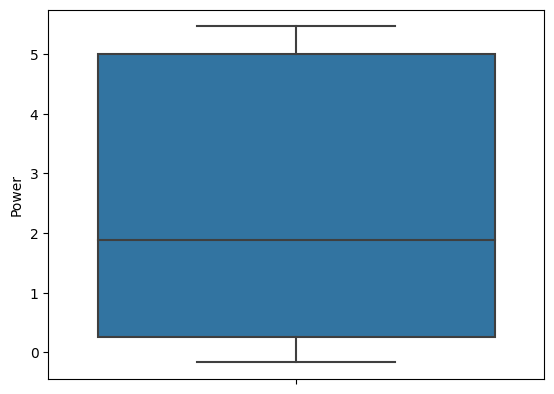

In [53]:
sns.boxplot(y=data['Power'])

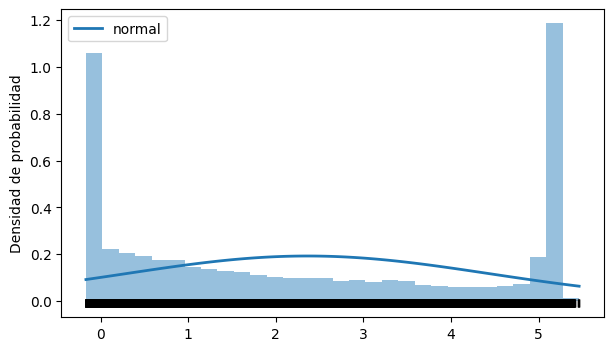

In [49]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['Power'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data['Power']), max(data['Power']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data['Power'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['Power'], np.full_like(data['Power'], -0.01), '|k', markeredgewidth=1)
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

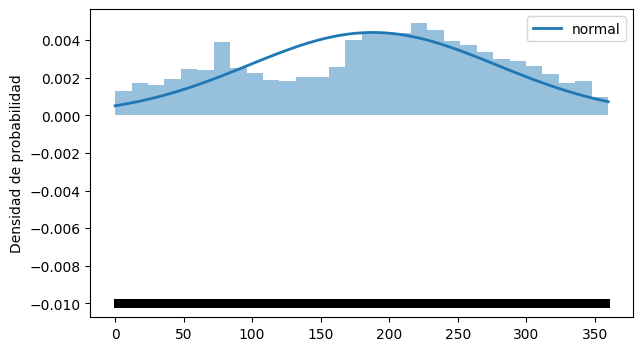

In [54]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindDirection'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data['WindDirection']), max(data['WindDirection']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data['WindDirection'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindDirection'], np.full_like(data['WindDirection'], -0.01), '|k', markeredgewidth=1)
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

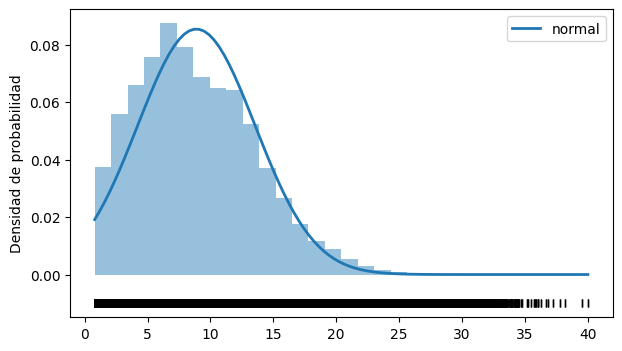

In [55]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['WindSpeed'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data['WindSpeed']), max(data['WindSpeed']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data['WindSpeed'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['WindSpeed'], np.full_like(data['WindSpeed'], -0.01), '|k', markeredgewidth=1)
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

se hace una transformacion de raiz cuadrada

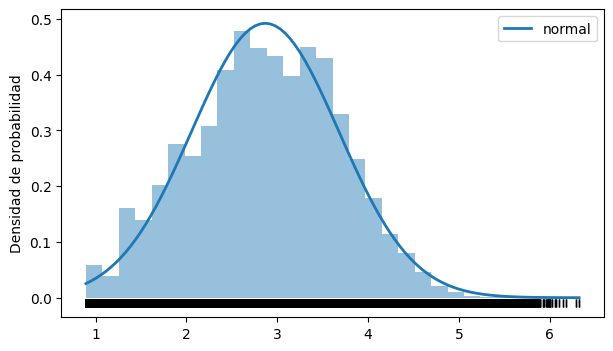

In [70]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(np.sqrt(data['WindSpeed']))

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(np.sqrt(data['WindSpeed'])), max(np.sqrt(data['WindSpeed'])), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=np.sqrt(data['WindSpeed']), density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(np.sqrt(data['WindSpeed']), np.full_like(np.sqrt(data['WindSpeed']), -0.01), '|k', markeredgewidth=1)
ax.set_ylabel('Densidad de probabilidad')
ax.legend();